# k-means++

k-means++はk-meansのアルゴリズムにおける初期化手法の一つです．k-meansアルゴリズムはランダムに初期値を設定するため局所最適解に陥る可能性があります．k-means++ではクラスター中心を既存のクラスター中心から遠い場所が選ばれやすくなるため局所解に陥りにくくなります．データセットが大きい場合やkが大きい値の時に良いパフォーマンスを発揮するそうです．

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/tabledata/clustering/k-means++.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn import cluster


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

### データの用意

In [6]:
#データの読み込み
d = datasets.load_wine()

#データを標準化
xs = scale(d.data)

### k-means++

In [7]:
#k-means法の設定、k=3で10種類の初期値を試す
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10)
#k-means法の実行
km.fit(xs)
cl = km.labels_

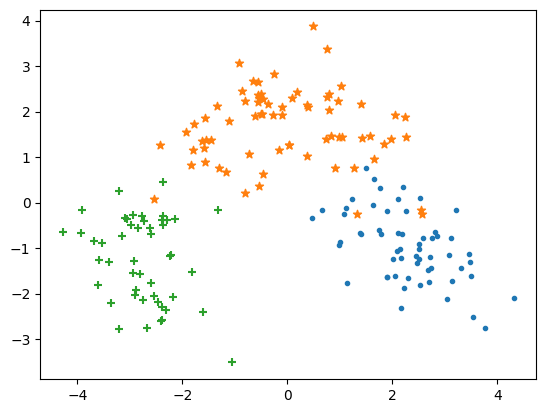

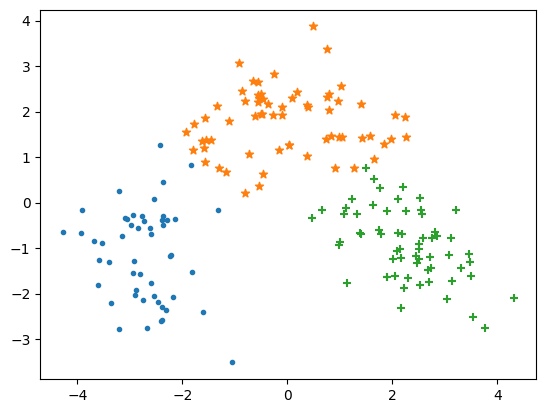

In [8]:
#データを主成分分析により二次元に縮約し、グラフ上に可視化する
pc = PCA(n_components=2)
pc.fit(xs)
#主成分スコアの計算
pxs = pc.transform(xs)

#もともとのクラスラベルのプロット
mk = ['.','*','+']
#np.arange(3)は等差数列を生成
for i in np.arange(3):
  idx = (d.target==i)
  plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()  

#k-means法による分類のプロット
for i in np.arange(3):
  idx = (cl == i)
  plt.scatter(pxs[idx,0],pxs[idx,1],marker=mk[i])
plt.show()